# Neuromodulation example  (bath)

This neuromodulation creates a small network of neurons. We also use the reaction diffusion model by Anu G Nair 2015.

To generate the ```reaction_diffusion_D1_from_SBTab.json``` file in ```data/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/``` from the xml file we run ```data/convert_sbtab_to_json.sh```

Reference for DA modulation cascade:

Lindroos R, Dorst MC, Du K, et al. Basal Ganglia Neuromodulation Over Multiple Temporal and Structural Scales-Simulations of Direct Pathway MSNs Investigate the Fast Onset of Dopaminergic Effects and Predict the Role of Kv4.2. Front Neural Circuits. 2018;12:3. Published 2018 Feb 6. doi:10.3389/fncir.2018.00003

Here we use the data from Planert:
Planert H, Berger TK, Silberberg G. Membrane properties of striatal direct and indirect pathway neurons in mouse and rat slices and their modulation by dopamine. PLoS One. 2013;8(3):e57054. doi:10.1371/journal.pone.0057054

The neurons are held at -60mV, or -80mV, then a current injection is applied for 500ms to trigger spiking.

Figure 4:



## Network setup

We have two neurons. The first neuron (Neuron 0) receives external input (cortical from t=0s and DA from t=0.1s). The cortical input will activate the first neuron, and through activation of synapses on the second neuron, we will see the dopamine level increase in the second neuron (Neuron 1).

The first neuron also receives direct DA activation from external input (starting at 100ms).

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import plotly.io as pio 
pio.templates.default = "simple_white"

In [2]:
import os
from snudda import Snudda

neuron_path = os.path.join("data", "dspn")
network_path = os.path.join("networks", "neuromodulation_bath_current_SBTab")

In [3]:
snudda = Snudda(network_path=network_path)
si = snudda.init_tiny(neuron_paths=neuron_path, neuron_names="dspn", number_of_neurons=[2], 
                      random_seed=123)

si.network_data["regions"]["Cube"]["neurons"]["dspn"]["reaction_diffusion"] = "data/JSON/reaction_diffusion_D1_from_SBTab.json"

# How the ion channels are modified by DA
si.network_data["regions"]["Cube"]["neurons"]["dspn"]["modulation"] = "modulation_parameters-v2.json"
# si.network_data["regions"]["Cube"]["neurons"]["dspn"]["modulation"] = "test-modulation-no-effect.json"
# si.network_data["regions"]["Cube"]["neurons"]["dspn"]["modulation"] = "test-modulation-exclude-all.json"


si.network_data["regions"]["Cube"]["neurons"]["dspn"]["modulation_key"] = "abc"

si.write_json()

snudda.create_network()

Warning, no snudda_data set!
Adding neurons: dspn from dir data/dspn
Writing networks/neuromodulation_bath_current_SBTab/network-config.json
Writing networks/neuromodulation_bath_current_SBTab/network-config.json
Placing neurons
Network path: networks/neuromodulation_bath_current_SBTab
Reading SNUDDA_DATA=None from networks/neuromodulation_bath_current_SBTab/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/data from networks/neuromodulation_bath_current_SBTab/network-synapses.hdf5
No n_putative_points and putative_density, setting n_putative_points = 63
(this must be larger than the number of neurons you want to place)
Generating 63 points for networks/neuromodulation_bath_current_SBTab/mesh/Cube-cube-mesh-2.917951293943981e-05.obj
Filtering, keeping inside points: 2 / 26
Managed to create 2 putative points within the volume.
  WARNING --> is the volume too small? You can create new cube mesh using create_cube_mesh.py

Example how to use create_cube_mesh.py:
from 

In [4]:
# Free memory
snudda = None

### No synaptic input, only current injections!

In [5]:
sim_output_neuromodulation_ON = os.path.join(network_path, "simulation", "output_neuromodulation_ON.hdf5")
sim_output_neuromodulation_OFF = os.path.join(network_path, "simulation", "output_neuromodulation_OFF.hdf5")

In [6]:
# mech_dir = os.path.join("..", "..", "..", "..", "BasalGangliaData", "data", "neurons", "mechanisms")
mech_dir = "/home/hjorth/BasalGangliaData/data/neurons/mechanisms"
sample_dt = None # 0.00005

# sim = snudda.simulate(time=0, mech_dir=mech_dir, verbose=True, sample_dt=sample_dt, output_file=sim_output_neuromodulation_ON)

In [7]:
# sim_config_on = os.path.join("data", "da_experiment_on.json")
# sim_config_off = os.path.join("data", "da_experiment_off.json")

snudda = None

sim_config_on = os.path.join("data", "da_experiment_cur_inj_on_bath_sbtab.json")
sim_config_off = os.path.join("data", "da_experiment_cur_inj_off_bath_sbtab.json")


sim_time = 3
n_workers = 2

## Running simulations

To see progress of the two simulations in log files ```networks/neuromodulation_ON_OFF/log/network-simulation-ON.txt``` and ```networks/neuromodulation_ON_OFF/log/network-simulation-OFF.txt```.

In [10]:
if n_workers > 1:
    run_str_on = f"mpirun -n {n_workers} snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_on} --mechdir {mech_dir} --enable_rxd_neuromodulation"
else:
    run_str_on = f"snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_on} --mechdir {mech_dir} --enable_rxd_neuromodulation"

print(run_str_on)

mpirun -n 2 snudda simulate networks/neuromodulation_bath_current_SBTab --time 3 --simulation_config data/da_experiment_cur_inj_on_bath_sbtab.json --mechdir /home/hjorth/BasalGangliaData/data/neurons/mechanisms --enable_rxd_neuromodulation


In [11]:
# %%timeit
os.system(run_str_on)

[debian-gnu-linux-11][[5433,1],0][../../../../../../opal/mca/btl/tcp/btl_tcp_proc.c:266:mca_btl_tcp_proc_create_interface_graph] Unable to find reachable pairing between local and remote interfaces
[debian-gnu-linux-11][[5433,1],1][../../../../../../opal/mca/btl/tcp/btl_tcp_proc.c:266:mca_btl_tcp_proc_create_interface_graph] Unable to find reachable pairing between local and remote interfaces


numprocs=2
args.ipython_profile = None
args.ipython_profile = None
args: Namespace(action='simulate', path='networks/neuromodulation_bath_current_SBTab', network_file=None, input_file=None, output_file=None, time=3.0, snudda_data=None, simulation_config='data/da_experiment_cur_inj_on_bath_sbtab.json', record_volt=True, randomseed=None, disable_synapses=None, disable_gj=None, mech_dir='/home/hjorth/BasalGangliaData/data/neurons/mechanisms', profile=False, verbose=False, exportCoreNeuron=False, record_all=None, enable_rxd_neuromodulation=True, disable_rxd_neuromodulation=None, ipython_profile=None)
MPI Rank: 1, Size: 2
Using input file None
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', path='networks/neuromodulation_bath_current_SBTab', network_file=None, input_file=None, output_file=None, 

0

### Rerun without neuromodulation

In [8]:
if n_workers > 1:
    run_str_off = f"mpirun -n {n_workers} snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_off} --mechdir {mech_dir} "
else:
    run_str_off = f"snudda simulate {network_path} --time {sim_time} --simulation_config {sim_config_off} --mechdir {mech_dir} "
    
print(run_str_off)

mpirun -n 2 snudda simulate networks/neuromodulation_bath_current_SBTab --time 3 --simulation_config data/da_experiment_cur_inj_off_bath_sbtab.json --mechdir /home/hjorth/BasalGangliaData/data/neurons/mechanisms 


In [9]:
os.system(run_str_off)

[debian-gnu-linux-11][[39420,1],1][../../../../../../opal/mca/btl/tcp/btl_tcp_proc.c:266:mca_btl_tcp_proc_create_interface_graph] Unable to find reachable pairing between local and remote interfaces
[debian-gnu-linux-11][[39420,1],0][../../../../../../opal/mca/btl/tcp/btl_tcp_proc.c:266:mca_btl_tcp_proc_create_interface_graph] Unable to find reachable pairing between local and remote interfaces


numprocs=2
args.ipython_profile = None
args: Namespace(action='simulate', path='networks/neuromodulation_bath_current_SBTab', network_file=None, input_file=None, output_file=None, time=3.0, snudda_data=None, simulation_config='data/da_experiment_cur_inj_off_bath_sbtab.json', record_volt=True, randomseed=None, disable_synapses=None, disable_gj=None, mech_dir='/home/hjorth/BasalGangliaData/data/neurons/mechanisms', profile=False, verbose=False, exportCoreNeuron=False, record_all=None, enable_rxd_neuromodulation=None, disable_rxd_neuromodulation=None, ipython_profile=None)
MPI Rank: 0, Size: 2
Using input file None
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
args.ipython_profile = None
args: Namespace(action='simulate', path='networks/neuromodulation_bath_current_SBTab', network_file=None, input_file=None, output_file=None,

0

## Load the data and plot

In [12]:
from snudda.utils import SnuddaLoadSimulation

nd = SnuddaLoadSimulation(sim_output_neuromodulation_ON)
time = nd.get_time()
data_pka = nd.get_data("PKAc", 1)[0][1]
data_da = nd.get_data("DA", 1)[0][1]
data_da_external = nd.get_data("DA", 0)[0][0]

# This is saved with add_rxd_internal_concentration_recording_all -- check that it worked 
data_pka_all0 = nd.get_data("PKAc", 0)[0][0]

Loading networks/neuromodulation_bath_current_SBTab/simulation/output_neuromodulation_ON.hdf5


In [24]:
nd.list_data_types(1)

['AC5',
 'AC5_ATP',
 'AC5_Ca',
 'AC5_Ca_ATP',
 'AC5_Ca_GaolfGTP',
 'AC5_Ca_GaolfGTP_ATP',
 'AC5_GaolfGTP',
 'AC5_GaolfGTP_ATP',
 'AMP',
 'ARPP21',
 'ATP',
 'B56PP2A',
 'B56PP2A_D32p75',
 'B56PP2A_pARPP21',
 'B56PP2Ap',
 'B56PP2Ap_D32p75',
 'B56PP2Ap_pARPP21',
 'B72PP2A',
 'B72PP2A_Ca',
 'B72PP2A_Ca_D32p34',
 'B72PP2A_Ca_D32p75',
 'B72PP2A_Ca_pARPP21',
 'B72PP2A_D32p34',
 'B72PP2A_D32p75',
 'B72PP2A_pARPP21',
 'CDK5',
 'CDK5_D32',
 'Ca',
 'CaM',
 'CaMKII',
 'CaMKII_CaM',
 'CaMKII_CaM_Ca2',
 'CaMKII_CaM_Ca2_psd',
 'CaMKII_CaM_Ca2_psd_Substrate',
 'CaMKII_CaM_Ca4',
 'CaMKII_CaM_Ca4_CaMKII_CaM_Ca4',
 'CaMKII_CaM_Ca4_psd',
 'CaMKII_CaM_Ca4_psd_CaMKII_CaM_Ca4_psd',
 'CaMKII_CaM_Ca4_psd_Substrate',
 'CaMKII_CaM_psd',
 'CaMKII_CaM_psd_Substrate',
 'CaMKII_psd',
 'CaM_Ca2',
 'CaM_Ca4',
 'CaM_Ca4_pARPP21',
 'D1R',
 'D1R_DA',
 'D1R_Golf',
 'D1R_Golf_DA',
 'D32',
 'D32p34',
 'D32p75',
 'DA',
 'GaolfGDP',
 'GaolfGTP',
 'Gbgolf',
 'Golf',
 'PDE10c',
 'PDE10c_cAMP',
 'PDE10r',
 'PDE10r_cAMP',
 'PDE4'

In [13]:
data_types = nd.list_data_types(0)
all_species_data = nd.get_all_data(neuron_id=0, exclude=["spikes", "voltage"])
time = nd.get_time()
voltage = nd.get_data("voltage", [0, 1])

In [25]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"  # Do not save plots in the notebook, they can get BIG

fig = go.Figure()
for data_type in all_species_data:
    idx = time >= 0.0
    fig.add_trace(go.Scatter(x=time[idx], y=all_species_data[data_type][0][0].T[0][idx], name=data_type, line={"width":4}))

fig.update_layout(xaxis_title="Time (s)", yaxis_title="Concentration (mM)", width=1000, height=800,
                 font={"size":18},  # General font size for all elements
                 legend={"font":{"size":16}},  # Specific font size for legend
                 xaxis={"title":{"font":{"size":20}}, "tickfont":{"size":14}},  # X-axis title and tick labels
                 yaxis={"title":{"font":{"size":20}}, "tickfont":{"size":14}})   # Y-axis title and tick labels

fig.show()

In [26]:
# Reporting plot

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"  # Do not save plots in the notebook, they can get BIG

fig = go.Figure()
for data_type in ["D1R_DA", "PKAc", "cAMP"]: #all_species_data:
    idx = time >= 0.0
    # Convert concentration to uM
    fig.add_trace(go.Scatter(x=time[idx], y=all_species_data[data_type][0][0].T[0][idx]*1e3, name=data_type, line={"width":7}))

fig.update_layout(xaxis_title="Time (s)", yaxis_title="Concentration (μM)", width=1000, height=800,
                  font={"size":40},  # General font size for all elements
                  legend={"font":{"size":40}},  # Specific font size for legend
                  xaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40}},  # X-axis title and tick labels
                  yaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40}, "dtick": 0.5})   # Y-axis title and tick labels


fig.show()

fig.write_image("example-da-cascade-1-sbtab.png", width=1200, height=800)


fig2 = go.Figure()
for data_type in ["cal12_ms.modulation_factor", "cal13_ms.modulation_factor", 
                  "kas_ms.modulation_factor", "kir_ms.modulation_factor", "naf_ms.modulation_factor", ]: #all_species_data:
    idx = time >= 0.0
    # data_type_str = data_type.replace("modulation_factor", "modulation")
    data_type_str = data_type.replace("_ms.modulation_factor", "")
    fig2.add_trace(go.Scatter(x=time[idx], y=all_species_data[data_type][0][0].T[0][idx], name=data_type_str, line={"width":7}))

fig2.update_layout(xaxis_title="Time (s)", yaxis_title="Modulation factor", width=1000, height=800,
                  font={"size":40},  # General font size for all elements
                  legend={"font":{"size":40}},  # Specific font size for legend
                  xaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40}},  # X-axis title and tick labels
                  yaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40}, "dtick": 0.25})   # Y-axis title and tick labels

fig2.show()
fig2.write_image("example-da-cascade-2-effect-sbtab.png", width=1200, height=800)


In [ ]:
# fig.write_html("ask-jeanette2.html")

In [14]:
data_types2 = nd.list_data_types(0)
all_species_data2 = nd.get_all_data(neuron_id=1, exclude=["spikes", "voltage"])
time = nd.get_time()
voltage = nd.get_data("voltage", [0, 1])

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"  # Do not save plots in the notebook, they can get BIG

fig = go.Figure()
for data_type in all_species_data2:
    fig.add_trace(go.Scatter(x=time, y=all_species_data2[data_type][0][1].T[0], name=data_type))

fig.update_layout(title="With DA modulation", xaxis_title="Time (s)", yaxis_title="Concentration (mM)", width=1000, height=800)
fig.show()
fig.write_image("DA_modulation_reactions-sbtab.png", width=1200, height=800)


In [15]:
from snudda.utils import SnuddaLoadSimulation

nd_off = SnuddaLoadSimulation(sim_output_neuromodulation_OFF)
time_off = nd_off.get_time()
voltage_off = nd_off.get_data("voltage", [0, 1])

Loading networks/neuromodulation_bath_current_SBTab/simulation/output_neuromodulation_OFF.hdf5


In [22]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"  # Do not save plots in the notebook, they can get BIG

fig = go.Figure()

sct_on = go.Scatter(x=time, y=voltage[0][0][:,0]*1e3, name="DA", opacity=0.5,  line={"width":5, "color":"red"})
sct_off = go.Scatter(x=time_off, y=voltage_off[0][0][:,0]*1e3, name="No DA", opacity=0.5,  line={"width":5, "color":"black"})
fig.add_traces([sct_on, sct_off])

fig.update_layout(xaxis_title="Time (s)", yaxis_title="Voltage (mV)", width=1000, height=800,
                  font={"size":40},  # General font size for all elements
                  legend={"font":{"size":50}},  # Specific font size for legend
                  xaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40}, "range":[1,2.5], "dtick": 0.5},  # X-axis title and tick labels
                  yaxis={"title":{"font":{"size":50}}, "tickfont":{"size":40},})   # Y-axis title and tick labels
fig.show()
fig.write_image("example-trace-sbtab.png", scale=2, height=800, width=1200)

In [23]:
fig = go.Figure()

sct_on = go.Scatter(x=time, y=voltage[0][1][:,0]*1e3, name="DA", opacity=0.5,  line={"width":5, "color":"red"})
sct_off = go.Scatter(x=time_off, y=voltage_off[0][1][:,0]*1e3, name="No DA", opacity=0.5,  line={"width":5, "color":"black"})
fig.add_traces([sct_on, sct_off])

fig.update_layout(xaxis_title="Time (s)", yaxis_title="Voltage (mV)", width=1000, height=800,
                  font={"size":40},  # General font size for all elements
                  legend={"font":{"size":50}},  # Specific font size for legend
                  xaxis={"title":{"font":{"size":40}}, "tickfont":{"size":40}, "range":[1,2.5], "dtick": 0.5},  # X-axis title and tick labels
                  yaxis={"title":{"font":{"size":40}}, "tickfont":{"size":40}})   # Y-axis title and tick labels

fig.show()
fig.write_image("example-trace2-sbtab.png", scale=2, height=800, width=1200)

## Plotting simulation with DA modulation 

DA is active from 0.3 to 1.3 seconds

Loading network info from networks/neuromodulation_bath_current_SBTab/network-synapses.hdf5
Loading networks/neuromodulation_bath_current_SBTab/simulation/output_neuromodulation_ON.hdf5
Plotting traces: [np.int64(0), np.int64(1)]
Plotted 2 traces (total 2)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/neuromodulation/networks/neuromodulation_bath_current_SBTab/figures/Network-voltage-trace--dspn-0-1.pdf


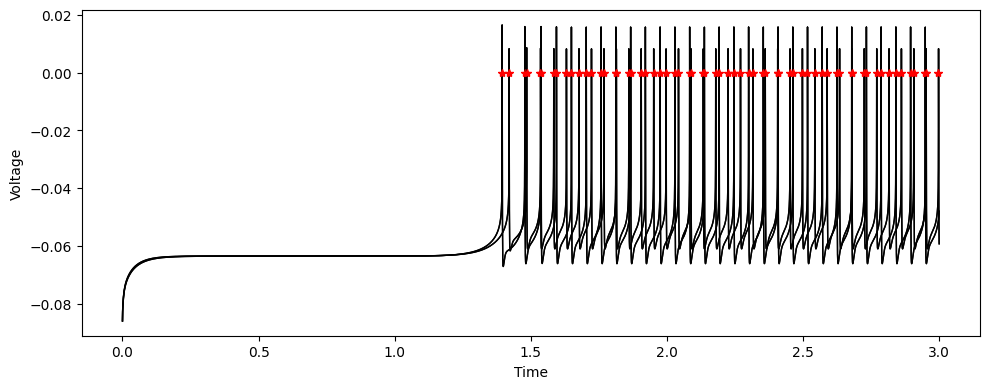

In [27]:
%matplotlib inline

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_output_neuromodulation_ON)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=None,fig_size=(10,4))

## Plot simulation, with neuromodulation disabled

Loading network info from networks/neuromodulation_bath_current_SBTab/network-synapses.hdf5
Loading networks/neuromodulation_bath_current_SBTab/simulation/output_neuromodulation_OFF.hdf5
Plotting traces: [np.int64(0), np.int64(1)]
Plotted 2 traces (total 2)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/neuromodulation/networks/neuromodulation_bath_current_SBTab/figures/Network-voltage-trace--dspn-0-1.pdf


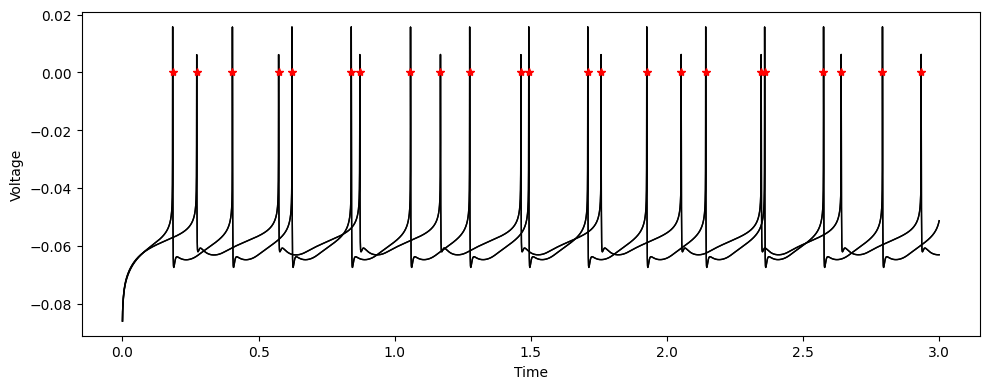

In [28]:
%matplotlib inline

from snudda.plotting.plot_traces import PlotTraces
pt_off = PlotTraces(output_file=sim_output_neuromodulation_OFF)
# Use trace_id to specify which traces
ax_off = pt_off.plot_traces(offset=0, time_range=None,fig_size=(10,4))

# Extracting steady state values

Extract steady state values: 
```../../../../../snudda/utils/extract_steady_state_values.py data/JSON/reaction_diffusion_D1.json networks/neuromodulation_bath_current/simulation/output_neuromodulation_ON.hdf5```

Verify that the rates are correct, the rename the JSON file ```reaction_diffusion_D1.json-updated``` to ```reaction_diffusion_D1.json```

In [ ]:
time_off = nd_off.get_time()
data_types_off = nd_off.list_data_types(0)
all_species_data_off = nd_off.get_all_data(neuron_id=0, exclude=["spikes", "voltage"])


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"  # Do not save plots in the notebook, they can get BIG

fig = go.Figure()
for data_type in all_species_data_off:
    idx = time >= 0.0
    fig.add_trace(go.Scatter(x=time_off[idx], y=all_species_data_off[data_type][0][0].T[0][idx], name=data_type))

fig.update_layout(title="No DA modulation", xaxis_title="Time (s)", yaxis_title="Concentration", width=1000, height=800)
fig.show()

In [ ]:
from snudda.plotting.plotly.trace import PlotTrace

pt_on = PlotTrace(snudda_load_simulation=nd)
pt_on.define_colour_by_neuron_id({0: "blue", 1: "red"})

pt_on.plot_traces()

In [ ]:
from snudda.plotting.plotly.trace import PlotTrace

pt_off = PlotTrace(snudda_load_simulation=nd_off)
pt_off.define_colour_by_neuron_id({0: "blue", 1: "red"})

pt_off.plot_traces()